In [1]:
import os
os.chdir('/Users/yanghy@us.ibm.com/Desktop/test')
import pandas as pd
from pulp import *
import numpy as np
import sys
from numpy import dot
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from allocation_notebook import * # it contains optimization functions

In [2]:
# this is the directory that you have data
directory = '/Users/yanghy@us.ibm.com/Desktop/processed/more_provider' 
wfpd = readcsv(directory)

In [3]:
sut_target = 0.8 # default target
collapse_group = False # default collapse
FTE_time = 60*2080 # default FTE mins per annum

In [4]:
pop_chronic_trend = wfpd['pop_chronic_trend']
pop_chronic_prev = wfpd['pop_chronic_prev']
pop_chronic_trend = wfpd['pop_chronic_trend']
chron_care_freq = wfpd['chron_care_freq']
geo_area = wfpd['geo_area_list']
service_characteristics = wfpd['service_characteristics']
pop_acute_need = wfpd['pop_acute_need']
population = wfpd['population']
provider_supply = wfpd['provider_supply']
pop_prev_need = wfpd['pop_prev_need']
provider_list = wfpd['provider_list']
encounter_detail = wfpd['encounter_detail']
overhead_work = wfpd['overhead_work']

In [5]:
#################################################################
# user inputs here - please change these
# option: 'ideal_staffing', 'ideal_staffing_current', 'service_allocation'
# subpotion: 
# for ideal_staffing' and 'ideal_staffing_current':"all_combination", "wage_max", "wage_weight"
# for service_allocation: subpotion = None
# for suboption ="wage_max", sub_option_value = maximum wage
# for suboption ="wage_weight", sub_option_value = wage weight

year = '2020'; current_year = '2018'; geo = 'State of Utah'
option1 = 'ideal_staffing' ; sub_option1 = "all_combination"; sub_option_value1 = None
###################################################################
#then run main function
out1, supply1 = main(geo, year, current_year, option1, sub_option1, sub_option_value1, 
                     sut_target, collapse_group, FTE_time, pop_chronic_trend, 
                     pop_chronic_prev, chron_care_freq, geo_area, service_characteristics, 
                     pop_acute_need, population, provider_supply , pop_prev_need , 
                     provider_list , encounter_detail, overhead_work)


In [6]:
out1.keys()

dict_keys(['total_wage', 'total_sutab', 'FTE', 'detail_f2f_mini'])

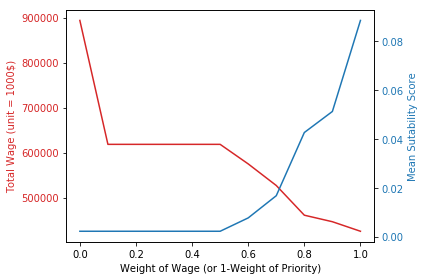

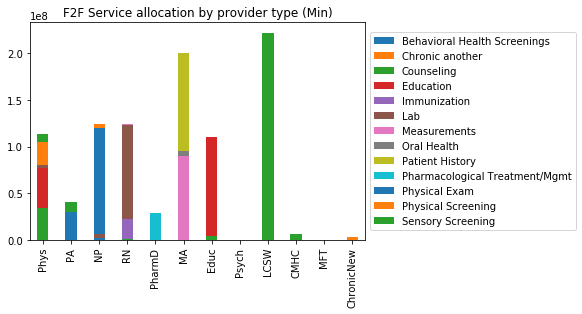

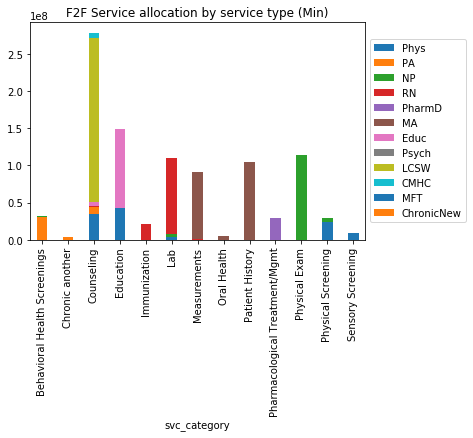

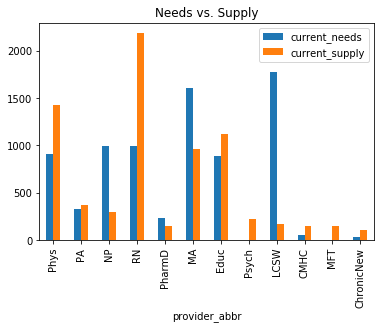

        Total Wage  Total sutability    Phys     PA      NP      RN  PharmD  \
w_0.0  893895050.0          0.002165  1992.0  557.5  1109.0  2255.0     0.0   
w_0.1  618289178.0          0.002165   910.5  322.5   997.0   997.5   233.5   
w_0.2  618289178.0          0.002165   910.5  322.5   997.0   997.5   233.5   
w_0.3  618289178.0          0.002165   910.5  322.5   997.0   997.5   233.5   
w_0.4  618289178.0          0.002165   910.5  322.5   997.0   997.5   233.5   
w_0.5  618289178.0          0.002165   910.5  322.5   997.0   997.5   233.5   
w_0.6  574770648.0          0.007641   568.5  322.5   997.0   997.5   233.5   
w_0.7  526750605.0          0.016740     0.0  368.0  1520.0   997.5   233.5   
w_0.8  460699372.0          0.042649     0.0  243.0    26.5  2596.5   233.5   
w_0.9  446193341.0          0.051282     0.0    0.0     0.0  2623.0   233.5   
w_1.0  424978567.0          0.088597     0.0    0.0   233.5  2606.5     0.0   

           MA    Educ  Psych    LCSW    CMHC     MF

In [7]:
# it shows total wage, total sutability & FTE and 
# plot - you can change 0.1 to other value [0~1]
if( isinstance(out1, dict) ):
    plotall(0.1, out1, supply1, option1, sub_option1, provider_list) 
    print( summaryout(out1,sub_option1 ) )

In [8]:
out1['detail_f2f_mini']

,encounter_category,encounter_type,svc_category,svc_desc,Phys,PA,NP,RN,PharmD,MA,Educ,Psych,LCSW,CMHC,MFT,ChronicNew,weight
0,Preventive,Well-Child Visits-Infant,Patient History,Patient History,0.0,1998620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Preventive,Well-Child Visits-Infant,Behavioral Health Screenings,Child Developmental Screening,0.0,339766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Preventive,Well-Child Visits-Infant,Behavioral Health Screenings,Child Developmental Surveillance,0.0,799449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Preventive,Well-Child Visits-Infant,Behavioral Health Screenings,Psychosocial/Behavioral Surveillance,0.0,399725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Preventive,Well-Child Visits-Infant,Behavioral Health Screenings,Maternal Depression Screening,0.0,799449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Preventive,Well-Child Visits-Infant,Measurements,length/height & weight,0.0,0.0,0.0,399725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Preventive,Well-Child Visits-Infant,Measurements,head circumference,0.0,0.0,0.0,399725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Preventive,Well-Child Visits-Infant,Measurements,BP,0.0,0.0,0.0,799449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Preventive,Well-Child Visits-Infant,Physical Exam,Physical Exam,0.0,0.0,1998620.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Preventive,Well-Child Visits-Infant,Sensory Screening,Vision Screening,399725.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
year = '2020'; current_year = '2018'
option2 = 'ideal_staffing_current' ; sub_option2 = "wage_max"; sub_option_value2 = 10000; #s_weight = 0.1
geo = 'State of Utah'
out2, supply2 = main(geo, year, current_year, option2, sub_option2, sub_option_value2, sut_target, collapse_group, FTE_time, 
         pop_chronic_trend, pop_chronic_prev, chron_care_freq, geo_area, service_characteristics, 
         pop_acute_need, population, provider_supply , pop_prev_need , provider_list , encounter_detail, overhead_work)

Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew
Excess providers in ChronicNew


ValueError: min() arg is an empty sequence

In [ ]:
if( isinstance(out2, dict) ):
    summaryout(out2,sub_option2)
    print( plotall(0.1, out2, supply2, option2, sub_option2, provider_list) )

In [ ]:
out2

In [ ]:
#################################################################
# user inputs here - please change these
year = '2018'; current_year = '2018'; geo = 'State of Utah'
option3 = 'service_allocation' ; sub_option3 = None; sub_option_value3 = None
###################################################################
#then run main function
out3, supply3 = main(geo, year, current_year, option3, sub_option3, sub_option_value3, 
                     sut_target, collapse_group, FTE_time, pop_chronic_trend, 
                     pop_chronic_prev, chron_care_freq, geo_area, service_characteristics, 
                     pop_acute_need, population, provider_supply , pop_prev_need , 
                     provider_list , encounter_detail, overhead_work)

In [ ]:
if( isinstance(out3, dict) ):
    plotall(sub_option_value3, out3, supply3, option3, sub_option3, provider_list) 